# Naive Bayes homework with Yelp review text

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv in your data directory and load it into a DataFrame
import pandas as pd
yelp = pd.read_csv('yelp.csv')

## Task 2

Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [2]:
# filter the DataFrame to only rows that have a 5-star or 1-star rating. Using an OR condition
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

## Task 3

Split the new DataFrame into training and testing sets, using the review text as the only feature and the star rating as the response.

In [3]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [5]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Task 4

Use CountVectorizer to create document-term matrices from X_train and X_test.

In [7]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
# fit and transform X_train, but only transform X_test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Task 5

Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [9]:
# import/instantiate/fit
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [11]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.918786692759


## Task 6

Calculate the AUC.

In [12]:
# y_test contains fives and ones, which will confuse the roc_auc_score function
y_test[:10].values

array([5, 5, 5, 5, 5, 1, 1, 5, 5, 5])

In [13]:
# create y_test_binary, which contains ones and zeros instead
y_test_binary = y_test.map({5:1, 1:0})

In [17]:
# predict class probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [18]:
# calculate the AUC using y_test_binary and y_pred_prob
print metrics.roc_auc_score(y_test_binary, y_pred_prob)

0.940353585141


## Task 7

Plot the ROC curve.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

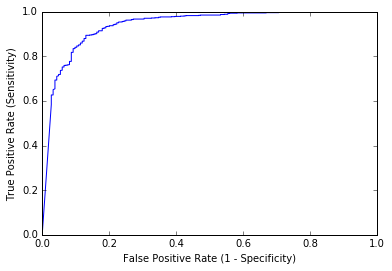

In [22]:
# plot ROC curve using y_test_binary and y_pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

## Task 8

Print the confusion matrix, and calculate the sensitivity and specificity. Comment on the results.

In [25]:
# print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[126  58]
 [ 25 813]]


In [30]:
# calculate sensitivity
sensitivity = 813.0/(813+25)
print sensitivity

0.970167064439


In [32]:
# calculate specificity
specificity= 126.0/(126+58)
print specificity

0.684782608696


The model is having a much easier time detecting five-star reviews than one-star reviews.

## Task 9

Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

In [34]:
#false positives
X_test[y_test < y_pred_class]

2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\nI brought my Mountain Bike in (w...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
2490    Lazy Q CLOSED in 2010.  New Owners cleaned up ...
9125    La Grande Orange Grocery has a problem. It can...
9185    For frozen yogurt quality, I give this place a...
436     this another place that i would give no stars ...
2051    Sadly with new owners comes changes on menu.  ...
1721    This is the closest to a New York hipster styl...
3447    If you want a school that cares more about you...
842     Boy is

In [35]:
#false negatives
X_test[y_test > y_pred_class]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
3149    I was told to see Greg after a local shop diag...
423     These guys helped me out with my rear windshie...
763     Here's the deal. I said I was done with OT, bu...
8956    I took my computer to RedSeven recently when m...
750     This store has the most pleasant employees of ...
9765    You can't give anything less than 5 stars to a...
6334    I came here today for a manicure and pedicure....
1282    Loved 

In [ ]:
#Sarcasm?

## Task 10

Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?

In [ ]:
# create a list that will store the results of the process below


# loop through the thresholds returned by the metrics.roc_curve function


In [ ]:
# locate the minimum difference (at which sensitivity and specificity are balanced)


## Task 11

Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:

- Define X and y using the original DataFrame from step 1. (y should contain 5 different classes.)
- Split the data into training and testing sets.
- Calculate the testing accuracy of a Naive Bayes model.
- Compare the testing accuracy with the null accuracy.
- Print the confusion matrix.
- Comment on the results.

In [ ]:
# define X and y using the original DataFrame


In [ ]:
# split into training and testing sets


In [ ]:
# create document-term matrices


In [ ]:
# fit a Naive Bayes model


In [ ]:
# make class predictions


In [ ]:
# calculate the testing accuary


In [ ]:
# calculate the null accuracy


In [ ]:
# print the confusion matrix


Comments:

